<hr>

# COVID-19 이해와 대응을 위한 탐색적 데이터 분석

### *데이터는 우리에게 무슨 말을 하고 있는가?*

<hr>

## 들어가며

최근 우리 사회에 가장 큰 파급력을 미치는 요인을 꼽자면 단연 코로나 바이러스를 들 수 있습니다. 이는 코로나로 인한 환자 증가 및 사망자 발생과 같은 삶과 죽음의 문제뿐 아니라 사회의 경제, 문화적인 기저를 흔들고 있기 때문입니다. 때문에 코로나에 대한 완전한 이해와 관리, 그리고 퇴치는 우리 사회에서 가장 먼저 다루어야 할 일임에는 이견이 없을 것입니다. <br>
이러한 상황 하에서, 매우 감사하게도 금번 국토교통부와 여러 관계 부처의 노력으로 매우 귀중한 빅데이터들 열람할 수 있게된 바, 본 참가팀은 해당 데이터에 대한 탐색적 데이터 분석(Exploratory Data Analysis)을 적용하여 데이터 분석 초기 단계에 기여하고자 합니다. 본 참가팀은 궁극적인 문제 해결에 있어 다양한 주체들이 서로다른 여러 관점에서 데이터를 분석하는 것이 매우 중요하다고 믿고 있기에, 저희 팀의 분석 결과를 기쁜 마음으로 공유드립니다.

## 결과 및 제언
코로나 전파에는 물리적 거리 외에도 지역 간 상관 관계가 존재함을 확인하였습니다. 이를 확인하기위해 본 참여팀은 수도권 및 전국의 지역을, 시간에 따른 코로나 발평 패턴 간 상관관계 분석을 통해 군집화하였으며, 각 군집에 대해 발병 케이스와의 관계를 확인해보았습니다. 그 결과, 소수 케이스는 여러 지역 군집에 걸쳐 발병하나, 대부분의 케이스는 특정 군집에 국한되어 있는 것을 확인하였습니다.<br>
이외 특기할만한 내용으로는, 신천지를 비롯, 경북쪽 발병패턴에서 해외 유입과의 강한 연관성을 볼 수 있다는 것입니다.<br>
마지막으로 수도권 인근의 경우 상시적인 발병들이 발생하고 있으나 두 번의 큰 wave가 감지되었으며, 그 외 지방의 경우 특정 케이스들에 강하게 영향을 받을 뿐, 이를 제외하면 전국적으로의 전파가 나타나지는 않았다는 점입니다.


<hr>

## 목차

### 서론

<ul>    
    <li>사용 데이터</li>
    <li>필요 모듈 및 설치</li>    
</ul>

### 본론

<ul>
    <li>데이터 전처리</li>
    <li>탐색1: 발병 시기에 따른 지역 군집화</li>
    <li>탐색2: 지역 군집화와 발병 케이스 간의 관계</li>
</ul>

### 결론


### 참고자료

<hr>

# 서론

## 사용 데이터

[제공 데이터]
<ul>    
    <li>한국도로공사 DSRC 데이터(85.67 GB)</li>
    <li>한국교통안전공단 교통카드 데이터(58.87 GB)</li>
    <li>한국교통안전공단 사업용차량운행기록정보 데이터(컬럼, 기간 조건 검색, 단일 파일 최대 3GB)</li>
    <li>한국철도공사 여객·광역 일별·역별 승하차 데이터(67.88 MB, 2.63 MB)</li>
    <li>한국교통연구원 차량 모빌리티 분석맵-노드,링크(82.20 MB, 24.85 MB)</li>
    <li>KT 유동인구 데이터(314.64 MB)</li>
    <li>DS4C팀 COVID-19 데이터(360.00 KB)</li>
    <li>한국교통안전공단 교통카드 데이터(58.87 GB)</li>
</ul>


[외부 데이터]
<ul>    
    <li>일단은 그런것 없음</li>
</ul>

# 필요 모듈 및 설치

## 필요 모듈 목록
<ul>    
    <li>pandas</li>
    <li>numpy</li>
    <li>seaborn</li>
    <li>matplotlib</li>
    <li>scipy</li>
    <li>sklearn</li>
    <li>bokeh</li>
    <li></li>
</ul>

## 설치 script

상기 모듈들의 설치가 필요하다면 아래 주석 해제 후 실행 부탁트립니다.

In [ ]:
#!conda install pandas seaborn matplotlib bokeh scipy sklearn

## 모듈 불러오기

In [67]:
import datetime
from collections import Counter

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy.stats as stats
from sklearn.cluster import SpectralClustering

from bokeh.palettes import Spectral10, Spectral6, Spectral4
from bokeh.plotting import figure, output_file, show,  output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.cluster import SpectralClustering
import networkx as nx
# 그래프 한글 환경 설정
# %config InlineBackend.figure_format = 'retina'
# !apt-get install -y fonts-nanum*

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

# 본론

## 데이터 전처리

In [75]:
# 데이터 불러오기
path = 'data_covid'
df_case = pd.read_csv(f'{path}/Case.csv')
df_patient = pd.read_csv(f'{path}/PatientInfo.csv', dtype={'patient_id':str, 'infected_by':str})
df_region = pd.read_csv(f'{path}/Region.csv')

# 지역 이름 수정
def fix_region(row):
    fixdic = {
        ('경기도','구리'):('경기도','구리시'),
        ('경기도','수원'):('경기도','수원시'),
        ('경기도','양평시'):('경기도','양평'),
        ('대구','경산시'):('경상북도','경산시'),
        ('대구','달성군'):('대구','달성'),
        ('대구','상곡 동'):('대구','대구'),
        ('대구','영천시'):('경상북도','영천시'),
        ('대구','이천동'):('대구','남구'),
        ('대전','세종'):('세종','세종'),
        ('전라남도','경산시'):('경상북도','경산시'),
        ('경상남도','하만'):('경상남도','함안군'),
        ('서울','동구 구'):('서울','동작구'),
        ('인천','미추홀 구'):('인천','미추홀구'),
        ('전라북도','지난'):('전라북도','진안군'),
        ('전라남도','시난'):('전라남도','신안군')
    }
    if (row.province, row.city) in fixdic.keys():
        row.province, row.city = fixdic[(row.province, row.city)]
    if (row.province == row.city) or (row.city == '기타'):
        #print((row.province,row.city))
        row.city = np.nan
    return row
df_patient = df_patient.apply(fix_region, axis=1)
df_region = df_region.apply(fix_region, axis=1)

# get patiend whose confirmed_date is not null
df_patient = df_patient.query('confirmed_date == confirmed_date')

df_patient['confirmed_dt'] = df_patient['confirmed_date'].apply(lambda x: datetime.datetime.fromisoformat(x))
min_date = df_patient['confirmed_dt'].min()
max_date = df_patient['confirmed_dt'].max()

date_range = list(pd.date_range(start=min_date,end=max_date))

df_dummy_date = pd.DataFrame.from_dict({
    'patiend_id': [-1] * len(date_range),
    'province': ['dummy_prov'] * len(date_range),
    'city': ['dummy_city'] * len(date_range),
    'confirmed_dt': date_range
    
})


df_patient = df_patient.append(df_dummy_date)
df_patient['valid'] = df_patient['patient_id'].apply(lambda x: 1 if isinstance(x, str) else 0)


df_region['id'] = df_region.apply(lambda x: (x['province'], x['city']), axis=1)

coords = df_region[['id','longitude','latitude']]

pos = {('해외',np.nan): (123, 37)}

for i, row in coords.iterrows():
    
    pos[row['id']] = (row['longitude'], row['latitude'])
    
    
# confirmed_num_groupby_city_prov 
confirmed_num_groupby_city_prov  = df_patient.groupby(['confirmed_dt','province','city']).agg({'valid':'sum'}).reset_index()
confirmed_num_groupby_city_prov = confirmed_num_groupby_city_prov.sort_values(['province', 'city', 'confirmed_dt'])

piv_confirmed_read = confirmed_num_groupby_city_prov.pivot(index = ['province','city'], columns='confirmed_dt', values='valid' ).fillna(0)

# Transpose it for date as a row
piv_confirmed = piv_confirmed_read.transpose().drop('dummy_prov', axis=1)
# piv_confirmed.rolling(5, min_periods=3, win_type='triang').sum().fillna(0.0)

# piv_confirmed_with_week = piv_confirmed.copy()
piv_confirmed_with_week = piv_confirmed.copy()

# group by week sequence of the year
piv_confirmed_with_week['week'] = list(map(lambda x: x.week, piv_confirmed_with_week.index))
piv_confirmed_with_week = piv_confirmed_with_week.groupby("week").sum()

# 수도권만 선택
choice = [c for c, x in zip(piv_confirmed.columns, piv_confirmed.sum(axis=0)) if c[0] in ['서울', '경기도', '인천']]


piv_confirmed = piv_confirmed[choice]

# 본론

## 탐색1: 발병 시기에 따른 지역 군집화

우리는 각 지역간 코로나 확산 패턴의 상관관계를 분석해보고 이를 통해 어떤 지역들이 발병 패턴의 관점에서 상관 관계를 갖고 있는지 알아보았습니다.

### 잠복기의 반영

확진자 데이터는 매우 불연속적인 시계열 값을 갖고 있습니다. 이럴 경우 간 상관관계를 구하기 어려우므로, 이를 해결하기 위해 코로나 잠복기 정보를 활용하였습니다 [1]. <br>
우리는 중국에서 발간된 코로나 잠복기에 관한 논문을 활용하였습니다. 해당 논문에서는 아래와 같은 잠복기 확률 분포를 도출하였습니다. (그림 A 참고)

<img src="https://www.nejm.org/na101/home/literatum/publisher/mms/journals/content/nejm/2020/nejm_2020.382.issue-13/nejmoa2001316/20200320/images/img_xlarge/nejmoa2001316_f2.jpeg" width=600>

우리 팀은 이 정보를 이용하여 각 point를 아래와 같이 확진자 그래프에 덮어보았습니다.

<AxesSubplot:xlabel='confirmed_dt', ylabel='province-city'>

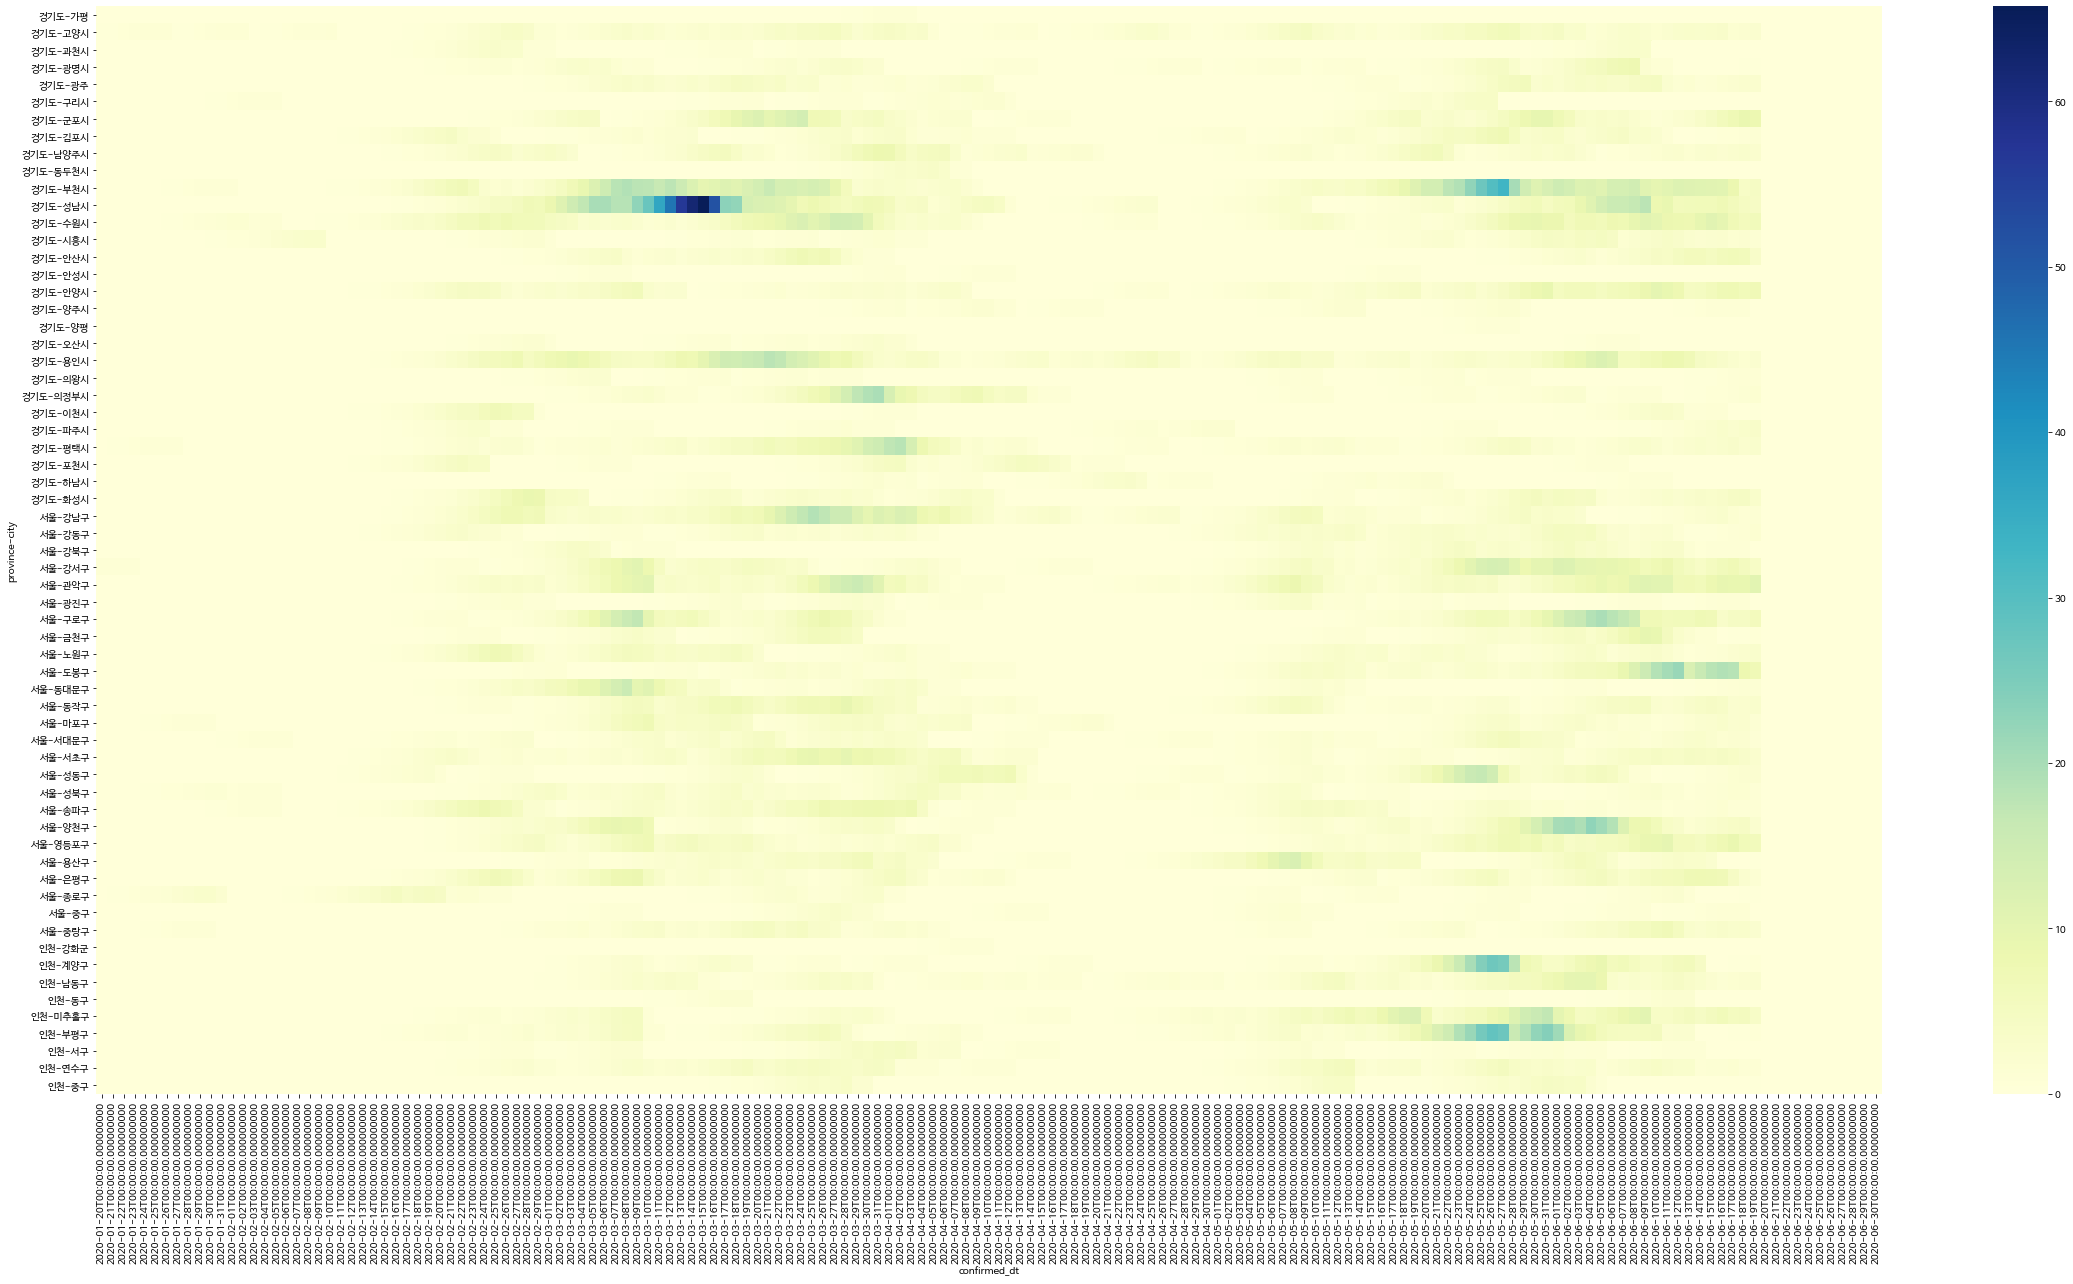

In [76]:
undetected_period_prob = [0, 0.06, 0.163, 0.177, 0.152, 0.1165, 0.087, 0.0635, 0.0465, 0.0345, 0.0255, 0.019, 0.0145, 0.011, 0.0085, 0.0061, 0.0045, 0.0035, 0.0028, 0.0022, 0.0014, 0.001]
shifting_size = int(len(undetected_period_prob) / 2)

def get_covid_infected_prob(daily_confirmed_number_list):
    
    infected_prob = np.array(np.flip(undetected_period_prob)).cumsum()
    conv_result = np.convolve(daily_confirmed_number_list, infected_prob, 'same')   
    shift_conv_result = np.append(conv_result[shifting_size:], np.zeros(shifting_size))  # 잠복기는 발생시점 21일 전부터 고려
    
    return shift_conv_result
    
    
df_piv_infected_prob = piv_confirmed.copy()
for cur_city in piv_confirmed:
    df_piv_infected_prob[cur_city] = get_covid_infected_prob(piv_confirmed[cur_city].values)
    
plt.rcParams['font.size'] = 10.
plt.rcParams['xtick.labelsize'] = 10.
plt.rcParams['ytick.labelsize'] = 10.
plt.rcParams['axes.labelsize'] = 10.
plt.figure(figsize=(40,20))
plt.rc('font', family='NanumBarunGothic')
sns.heatmap(df_piv_infected_prob.T, cmap="YlGnBu")

### 클러스터링

저희는 각 지역간의 시간에 따른 발병 패턴간 상관관계를 구하여, 이를 Spectral Clustring 알고리즘을 이용하여 군집화해보았습니다. 이 때, 주요한 설계 parameter는 군집화 개수입니다. 좋은 군집화 개수를 선별하기 위해, 저희는 20이라는 비교적 큰 수에서부터 시작하여 군집화된 결과를 시각화 해보고, 그 중 하나의 군집으로 묶일 가능성이 커보이는 것들(즉, diagonal에서 먼 영역의 값이 크게 존재하는 것들)이 관측되면 점점 군집 개수를 줄여보았습니다.

/opt/conda/envs/thkim/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


dict_values([14, 2, 4, 31, 12])


/opt/conda/envs/thkim/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/thkim/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

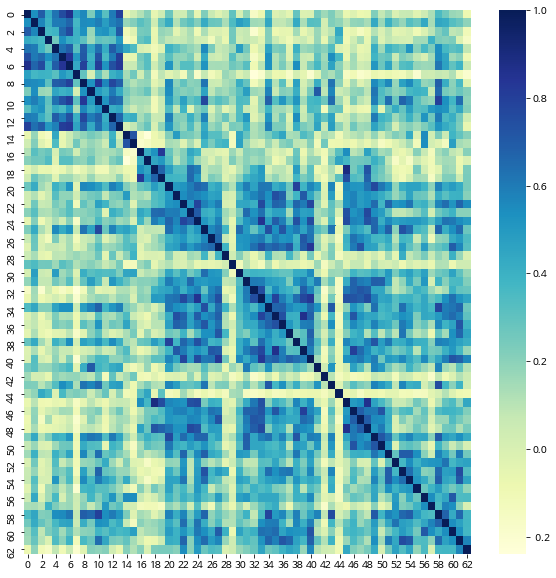

In [77]:
num_clusters = 5
corr_threshold = 0.5

def show_groups(sorted_list):    
    dic = {}    
    for item in sorted_list:        
        if item[1] in dic:
            dic[item[1]].append(item[0])
        else:
            dic[item[1]] = [item[0]]
    return dic

corr_mat = df_piv_infected_prob.corr()
clustering = SpectralClustering(n_clusters=num_clusters,
                                assign_labels="kmeans", # or "discretize",
                                random_state=0, affinity="precomputed").fit(corr_mat.values > corr_threshold)

z = list(zip(list(corr_mat.index), clustering.labels_))
sorted_list = sorted([zi for zi in z], key=lambda x: x[1])
sorted_prov_ct = [x[0] for x in sorted_list]
num_cluter_elements = Counter([x[1] for x in sorted_list]).values()
print(num_cluter_elements)

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat.loc[sorted_prov_ct][sorted_prov_ct].values, cmap="YlGnBu")

### 군집 내 발평 history 시각화

우리는 각 군집별로 발병 history를 시각화

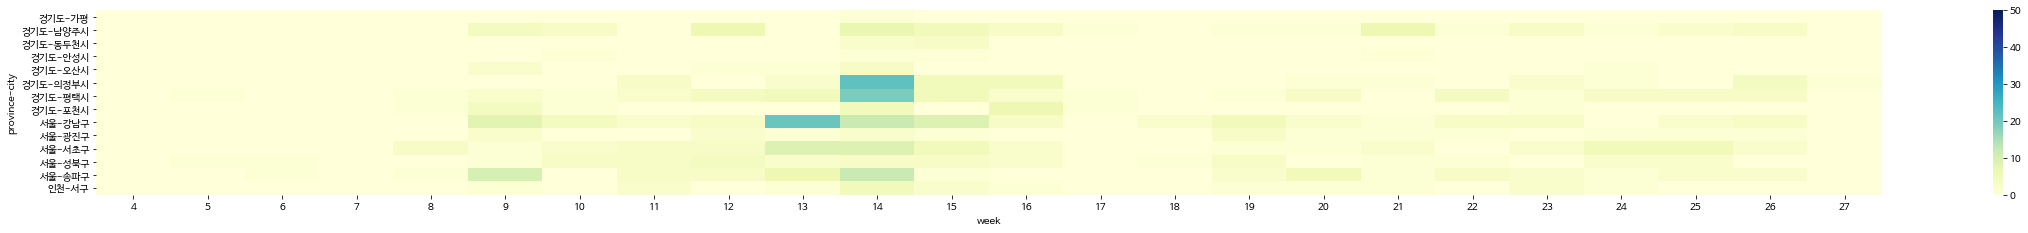

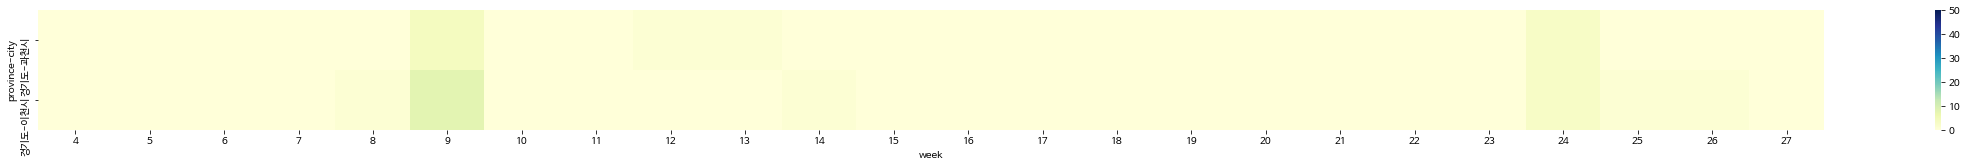

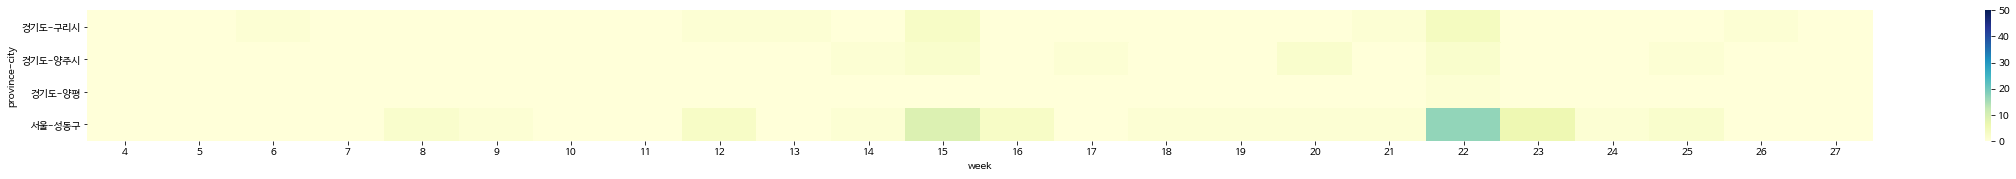

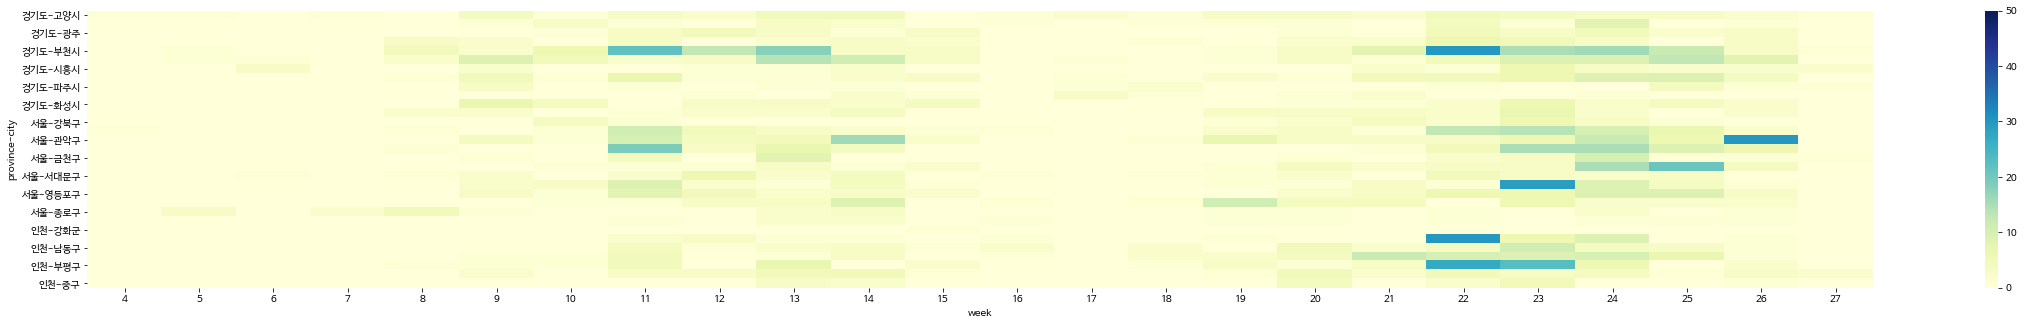

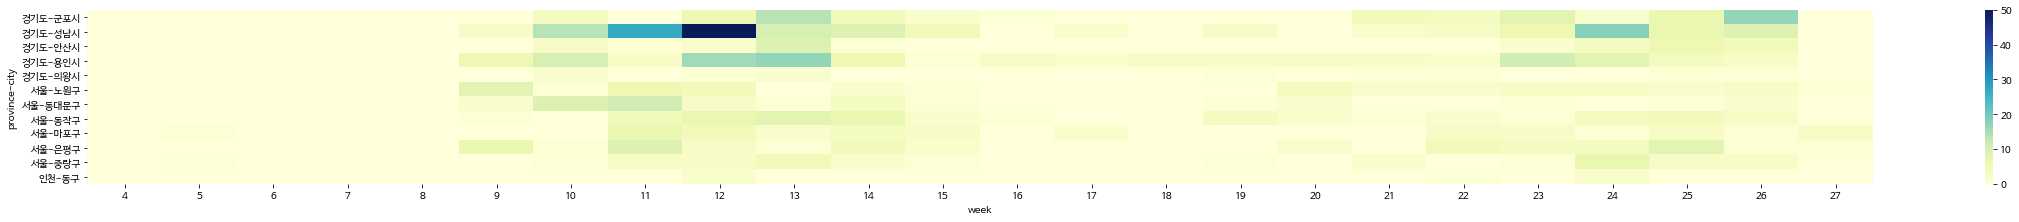

In [78]:
df_plotting_target = df_piv_infected_prob

sorted_list = sorted(sorted(list(zip(df_plotting_target.columns, clustering.labels_)), key=lambda x: x[0]), key=lambda x: x[1])

for cluster_index in range(0, max(clustering.labels_)+1):
    cur_cluster = [s[0] for s in sorted_list if s[1] == cluster_index]
    plt.figure(cluster_index, figsize=(40,len(cur_cluster)/10+2))
    sns.heatmap(piv_confirmed_with_week[cur_cluster].T, cmap="YlGnBu", vmin=0, vmax=50)
plt.show()

<AxesSubplot:>

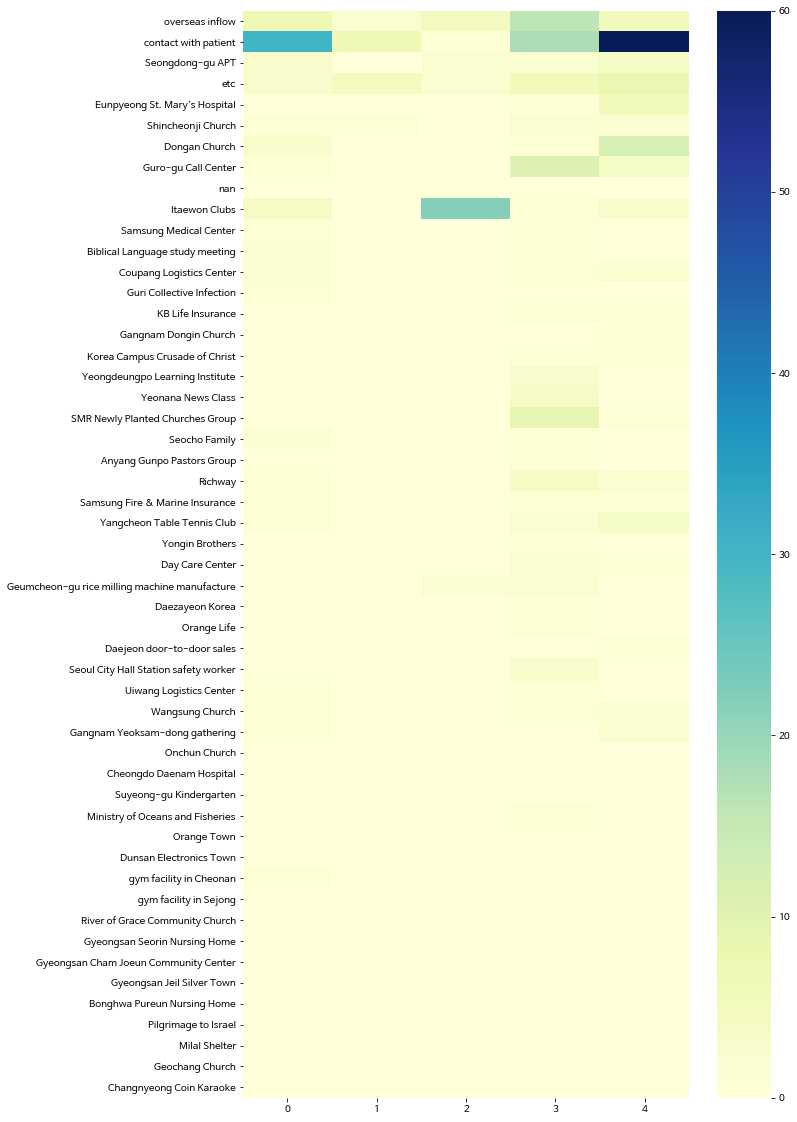

In [79]:
cluster_regions = [[] for _ in range(num_clusters)]

for region, cluster_number in list(zip(list(df_piv_infected_prob.T.index), clustering.labels_)):
    cluster_regions[cluster_number].append(region)

infection_cases = df_patient['infection_case'].unique()
df_region_infection_cases = pd.DataFrame(np.zeros((num_clusters, len(infection_cases))), columns=infection_cases)
for cidx, regions in enumerate(cluster_regions):
    cur_cluster_regions = set(regions)
    
    for i, df_cur_group in df_patient.groupby('infection_case'):
        locations = set(df_cur_group.apply(lambda x: (x['province'], x['city']), axis=1).unique())
        
        for province, city in locations:
            num_infections = len(df_cur_group.query('province == @province and city == @city'))
            
            if (province, city) in cur_cluster_regions:
                df_region_infection_cases[i].iloc[cidx] = num_infections
                
                
plt.figure(999, figsize=(10,20))
sns.heatmap(df_region_infection_cases.T, cmap="YlGnBu")

In [80]:


df_result = pd.DataFrame({
    'id': list(corr_mat.index),
    'cluster_id': clustering.labels_
})


df_result = df_result.merge(coords, how='left', left_on='id', right_on='id')



df_result['color'] = df_result.cluster_id.apply(lambda x: Spectral6[x])



p = figure(plot_height=800, plot_width=600, title="""
감염자수 증감 상관관계기반 클러스터와 그 지리적 위치""")

output_notebook()

for i in sorted(df_result.cluster_id.unique()):

    p.circle(x='longitude', y='latitude', source=ColumnDataSource(data={
        'longitude' : df_result.query("cluster_id==@i").longitude.values,
        'latitude' : df_result.query("cluster_id==@i").latitude.values,
        'cluster': df_result.query("cluster_id==@i").cluster_id.values,
        'color': df_result.query("cluster_id==@i").color.values,
        'label': df_result.query("cluster_id==@i").id.values
    }), legend_label=f"cluster {i}", size=15, alpha=0.8, muted_alpha=0.1, color='color')


p.add_tools(HoverTool(tooltips = [
    ('city', '@label'),
    ('cluster', '@cluster')
]))



p.legend.click_policy = 'mute'

print("클러스터 범례를 클릭하시면 해당 클러스터를 on/off하실 수 있습니다.")
show(p)




Loading BokehJS ...

클러스터 범례를 클릭하시면 해당 클러스터를 on/off하실 수 있습니다.


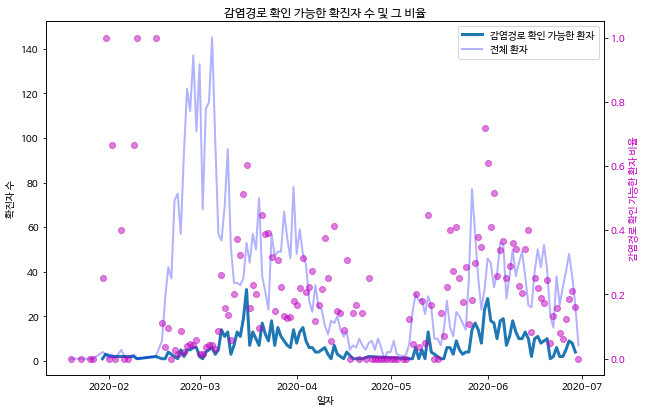

In [88]:

roots = df_patient.query('patient_id != -1 and infected_by != infected_by and province in ("서울", "경기도", "인천")').sort_values("confirmed_dt")

roots = list(roots.patient_id.values)

nth_infection = {}

n = 1

queried = df_patient.query("infected_by in @roots")

listed = roots

while len(queried) > 0:
    
    this_infected = list(queried.patient_id.values)
    
    this_infected_wo_double_listed = set(this_infected) - set(listed)
    
    listed = listed + this_infected
    
    nth_infection[n] = [(row['infected_by'], row['patient_id']) for i, row in queried.iterrows()]
    n += 1
    queried = df_patient.query("infected_by in @this_infected_wo_double_listed")
    
    

G = nx.DiGraph()


all_cases = []

for k, v in nth_infection.items():
    all_cases += v
    


G.add_edges_from(all_cases)

from_patient = [e[0] for e in G.edges]
to_patient = [e[1] for e in G.edges]

df_patient.loc[df_patient['patient_id'] == '1000000138','province'] = '경기도'
df_patient.loc[df_patient['patient_id'] == '1000000138','city'] = '성남시'
df_patient[df_patient['patient_id'] == '1000000138']


df_patient.loc[df_patient['infected_by'] == '2002000001', 'infected_by'] = '2000000001'


df_tmp = pd.DataFrame({
    'from_patient': from_patient,
    'to_patient': to_patient
})



for_from_join = df_patient.query("patient_id != -1")[['patient_id','sex','age','country','province','city','contact_number','confirmed_dt']]

for_from_join.columns = ['patient_id','from_sex','from_age','from_country','from_pv','from_ct','from_contact_n','from_cf_dt']

df_tmp = df_tmp.merge(for_from_join, how='left', left_on='from_patient', right_on='patient_id').drop('patient_id', axis=1)

for_to_join = df_patient[['patient_id', 'sex', 'age','country','province','city','contact_number','confirmed_dt']]

for_to_join.columns = ['patient_id','to_sex','to_age','to_country','to_pv','to_ct','to_contact_n','to_cf_dt']


df_tmp = df_tmp.merge(for_to_join, how='left', left_on='to_patient', right_on='patient_id').drop('patient_id', axis=1)

df_tmp['from_pv'] = df_tmp.apply(lambda x: "최초" if x['from_patient'] == -1 else x['from_pv'], axis=1)

# df_tmp['from_to_loc'] = df_tmp.apply(lambda x: (x['from_patient'], (x['from_pv'], x['from_ct']), (x['to_pv'], x['to_ct'])), axis=1)
df_tmp['from_to_loc'] = df_tmp.apply(lambda x: ((x['from_pv'], x['from_ct']), (x['to_pv'], x['to_ct'])), axis=1)


case_trackable = df_tmp.sort_values('to_cf_dt').groupby(['to_cf_dt']).agg(
    {'to_patient':'count'}#{'to_contact_n':sum_numeric}
)

case_all = df_patient.query("valid == 1").groupby(['confirmed_dt']).agg(
    {'patient_id':'count'}#{'to_contact_n':sum_numeric}
)

case_trackable, case_all

fig, ax1 = plt.subplots(figsize=(10, 6.5))


pd.concat([case_all, case_trackable])
ax1.plot(case_trackable.index, case_trackable['to_patient'].values, label = '감염경로 확인 가능한 환자', lw=3)
ax1.plot(case_all.index, case_all['patient_id'].values, label = '전체 환자', lw=2, color='b', alpha=0.3)



ax1.set_xlabel('일자')
ax1.set_ylabel('확진자 수')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that


case_trackable = case_trackable.reset_index()
case_all = case_all.reset_index()


case_all = case_all.merge(case_trackable, how='left', left_on='confirmed_dt', right_on='to_cf_dt').fillna(0).sort_values('confirmed_dt')


case_all['ratio_trackable'] = case_all.apply(lambda x: x['to_patient']/x['patient_id'], axis=1)

ax2.scatter(case_all.confirmed_dt, case_all['ratio_trackable'].values, color='m', alpha=0.5)
ax2.set_ylabel('감염경로 확인 가능한 환자 비율', color='m') 
ax2.tick_params(axis='y', labelcolor='m')

plt.title("감염경로 확인 가능한 확진자 수 및 그 비율")
ax1.legend()

plt.show()

### 감염경로 확인 가능한 확진자 수가 의료자원 부족이나 확진자 폭증 등으로 인해 영향을 받았을까?

- Fluctuation이 존재하긴 하지만 감염 경로 확인 가능한 환자의 비율은 유사한 수준으로 유지됨
- 즉, 깜깜이 전파를 제외하고 감염 경로 확인 가능한 확진자만 보더라도 어느정도 대표성을 띈다고 볼 수 있음

[(('서울', nan), 13), (('인천', '미추홀구'), 12), (('서울', '강서구'), 11), (('인천', '부평구'), 9), (('서울', '서초구'), 8), (('경기도', '성남시'), 8), (('서울', '관악구'), 7), (('경기도', '용인시'), 7), (('서울', '노원구'), 6), (('서울', '강남구'), 6), (('경기도', '의정부시'), 6), (('경기도', '군포시'), 6), (('경기도', '부천시'), 6), (('경기도', '안양시'), 6), (('경기도', '고양시'), 5), (('서울', '구로구'), 5), (('서울', '양천구'), 5), (('서울', '금천구'), 5), (('경기도', '남양주시'), 5), (('인천', '계양구'), 5), (('서울', '서대문구'), 4), (('경기도', '화성시'), 4), (('서울', '중랑구'), 3), (('서울', '강동구'), 3), (('서울', '동작구'), 3), (('서울', '영등포구'), 3), (('서울', '용산구'), 3), (('인천', '연수구'), 3), (('경기도', '평택시'), 3), (('경기도', '수원시'), 3), (('서울', '종로구'), 2), (('서울', '성북구'), 2), (('서울', '동대문구'), 2), (('서울', '은평구'), 2), (('서울', '송파구'), 2), (('인천', '남동구'), 2), (('경기도', '광명시'), 2), (('인천', '서구'), 2), (('경기도', '구리시'), 2), (('서울', '강북구'), 2), (('서울', '성동구'), 1), (('서울', '중구'), 1), (('인천', '중구'), 1), (('경기도', '광주'), 1), (('경기도', '안산시'), 1), (('경기도', '오산시'), 1), (('경기도', '포천시'), 1), (('서울', '광진구'), 1), (('서울', '도봉구'), 1),

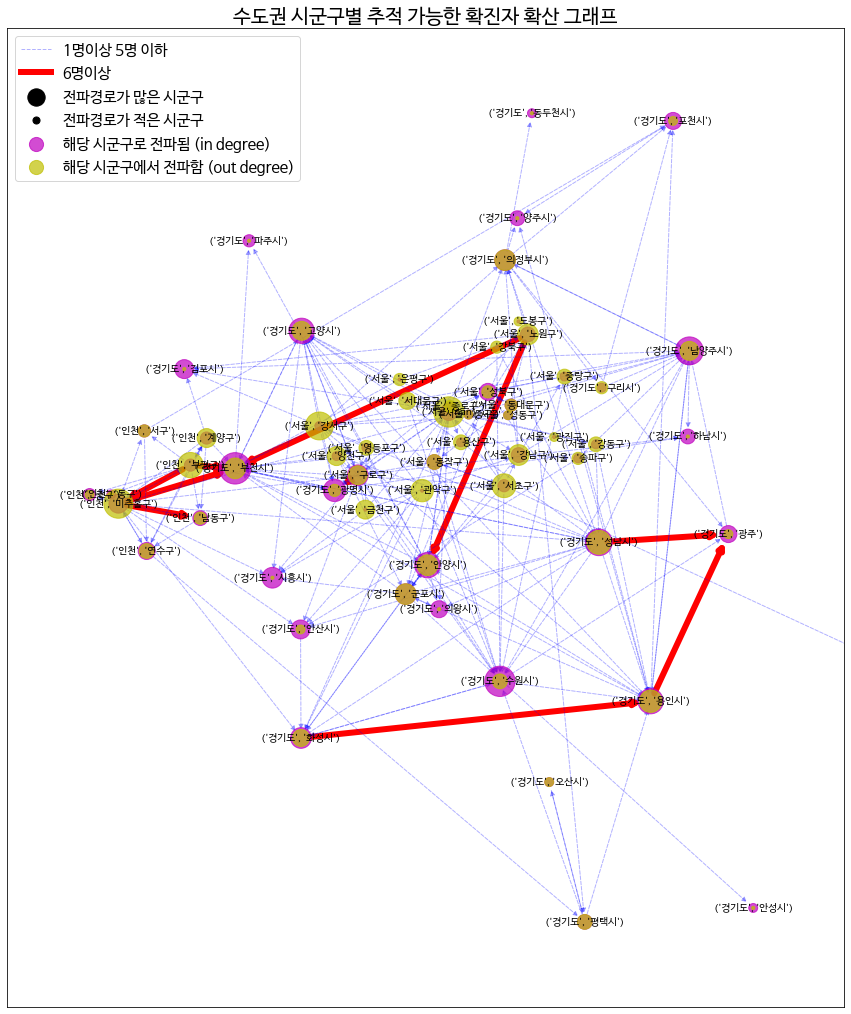

In [89]:

locG = nx.DiGraph()

import collections

edge_weight = collections.Counter(df_tmp.query("to_cf_dt < '2020-07-01' and from_pv in ('서울','경기도','인천') and to_pv in ('서울','경기도','인천')")['from_to_loc'].values)


edges = []
for k, v in edge_weight.items():
    if k[0] != k[1]:
        edges.append((k[0], k[1], v))
    
    
locG.add_weighted_edges_from(edges)
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()
plt.figure(figsize=(15, 18))
font_name = font.get_name()

large = 5
mid = 5
small = 0

elarge = [(u, v) for (u, v, d) in locG.edges(data='weight') if d > large]
emid = [(u, v) for (u, v, d) in locG.edges(data='weight') if mid< d <= large]
esmall = [(u, v) for (u, v, d) in locG.edges(data='weight') if small< d <= mid]
# esmall = []


ns = []
es = []


def get_indegree(lst, G):
    
    ret = []
    d = dict(G.in_degree)
    for i in lst:
        
        ret.append(d[i]*70 + 10)
        
    return ret
        
def get_outdegree(lst, G):
    
    ret = []
    d = dict(G.out_degree)
    for i in lst:
        
        ret.append(d[i]*70 + 10)
        
    return ret
        

for a in elarge + emid + esmall :
    
    ns.append(a[0])
    ns.append(a[1])
    
    es.append(a)
    
ns= list(set(ns))

# nodes
# nx.draw_networkx_nodes(locG, pos, node_size=100, nodelist=ns)
nx.draw_networkx_nodes(locG, pos, node_size=get_indegree(ns,locG), nodelist=ns, node_color='m', alpha=0.7)
nx.draw_networkx_nodes(locG, pos, node_size=get_outdegree(ns,locG), nodelist=ns, node_color='y', alpha=0.7)


# edges
nx.draw_networkx_edges(locG, pos, edgelist=elarge, width=6, edge_color='r')

nx.draw_networkx_edges(locG, pos, edgelist=emid, width=3)

nx.draw_networkx_edges(
    locG, pos, edgelist=esmall, width=1, alpha=0.3, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(locG, pos, font_size=10, font_family=font_name)

print(sorted(locG.out_degree(), key=lambda x: x[1], reverse=True)) 
# plt.axis("off")


plt.scatter([240],[37], s=300, color='k', label='전파경로가 많은 시군구')
plt.scatter([240],[37], s=50, color='k', label='전파경로가 적은 시군구')

plt.scatter([240],[37], s=200, color='m', alpha=0.7, label='해당 시군구로 전파됨 (in degree)')
plt.scatter([240],[37], s=200, color='y', alpha=0.7, label='해당 시군구에서 전파함 (out degree)')

plt.plot([240,241],[37,37], lw=1, alpha=0.3, color="b", linestyle="--", label=f'{small+1}명이상 {mid}명 이하')
# plt.plot([240,241],[37,37], lw=3, color="k", label=f'{mid+1}명이상 {large}명 이하')
plt.plot([240,241],[37,37], lw=6, color="r", label=f'{large+1}명이상')


plt.legend(fontsize=15)

plt.title("수도권 시군구별 추적 가능한 확진자 확산 그래프", fontsize=20)
plt.xlim((126.54, 127.37))
plt.show()


### 전파경로가 많은 시군구와 실제로 많은 인원을 감염시킨 시군구간의 상관관계?

- 용어정의: __전파경로(degree)__ 전파경로는 유입경로(in degree)와 유출경로(out degree)의 총 합 (확진자수 X)
  * 유입경로는 다른 시군구에서 해당 시군구를 감염시킨 경우(in degree)를 의미함, 
  * 유출경로는 해당 시군구에서 감염이 시작되어 타 시군구를 감염시킨 경우(out degree)를 의미함 
  * 예: 유입경로가 2개인 경기도 파주시의 경우 고양시, 부천시의 두 개 시(city)에서 확진된 환자로부터 확진자가 발생하였음
  
- 대체적으로 경기도는 주로 타 시군구에서 발생한 확진자로 인해 전파되는 비율이 더 높고, 서울은 타 시군구로 전파시키는 경로가 더 많음
- 즉, 서울에서 확진 판정을 받은 환자의 전염성이 더 높거나 혹은 활동 반경이 더 넓은 것으로 보임

- 전파되는 경로도 많고 전파시키는 경로도 많은 시군구 (예: 경기 안양시, 경기 부천시, 경기 용인시, 경기 성남시, 경기 의정부시 등)가 주요한 길목으로 파악됩니다.


## 참고자료

[1] Li, Qun, et al. "Early transmission dynamics in Wuhan, China, of novel coronavirus–infected pneumonia." New England Journal of Medicine (2020).

<hr>

'본 저작물의 저작권은 Apache License v2.0을 따릅니다'